### Simple SVM model for INITIAL dataset


Loading and preprocessing data...
Performing cross-validation...
Fold 1
Accuracy: 0.1957
F1-Score: 0.1423

Fold 2
Accuracy: 0.2045
F1-Score: 0.1470

Fold 3
Accuracy: 0.2071
F1-Score: 0.1495

Fold 4
Accuracy: 0.1970
F1-Score: 0.1468

Fold 5
Accuracy: 0.2184
F1-Score: 0.1649


SVM Model Results:
Mean Accuracy: 0.2045 (+/- 0.0082)
F1-score: 0.1530
Precision: 0.1569
Recall: 0.2045
Training time: 12.83 seconds

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.37      0.71      0.49        24
         Active       0.05      0.04      0.04        24
          Adult       0.00      0.00      0.00        10
          Agile       0.25      0.34      0.29        29
       Alluring       0.40      0.63      0.49        43
        Amiable       0.00      0.00      0.00        19
        Amusing       0.50      0.17      0.25        24
   Aristocratic       0.00      0.00      0.00        14
       Aromatic       0.33      0.16      0.21       

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

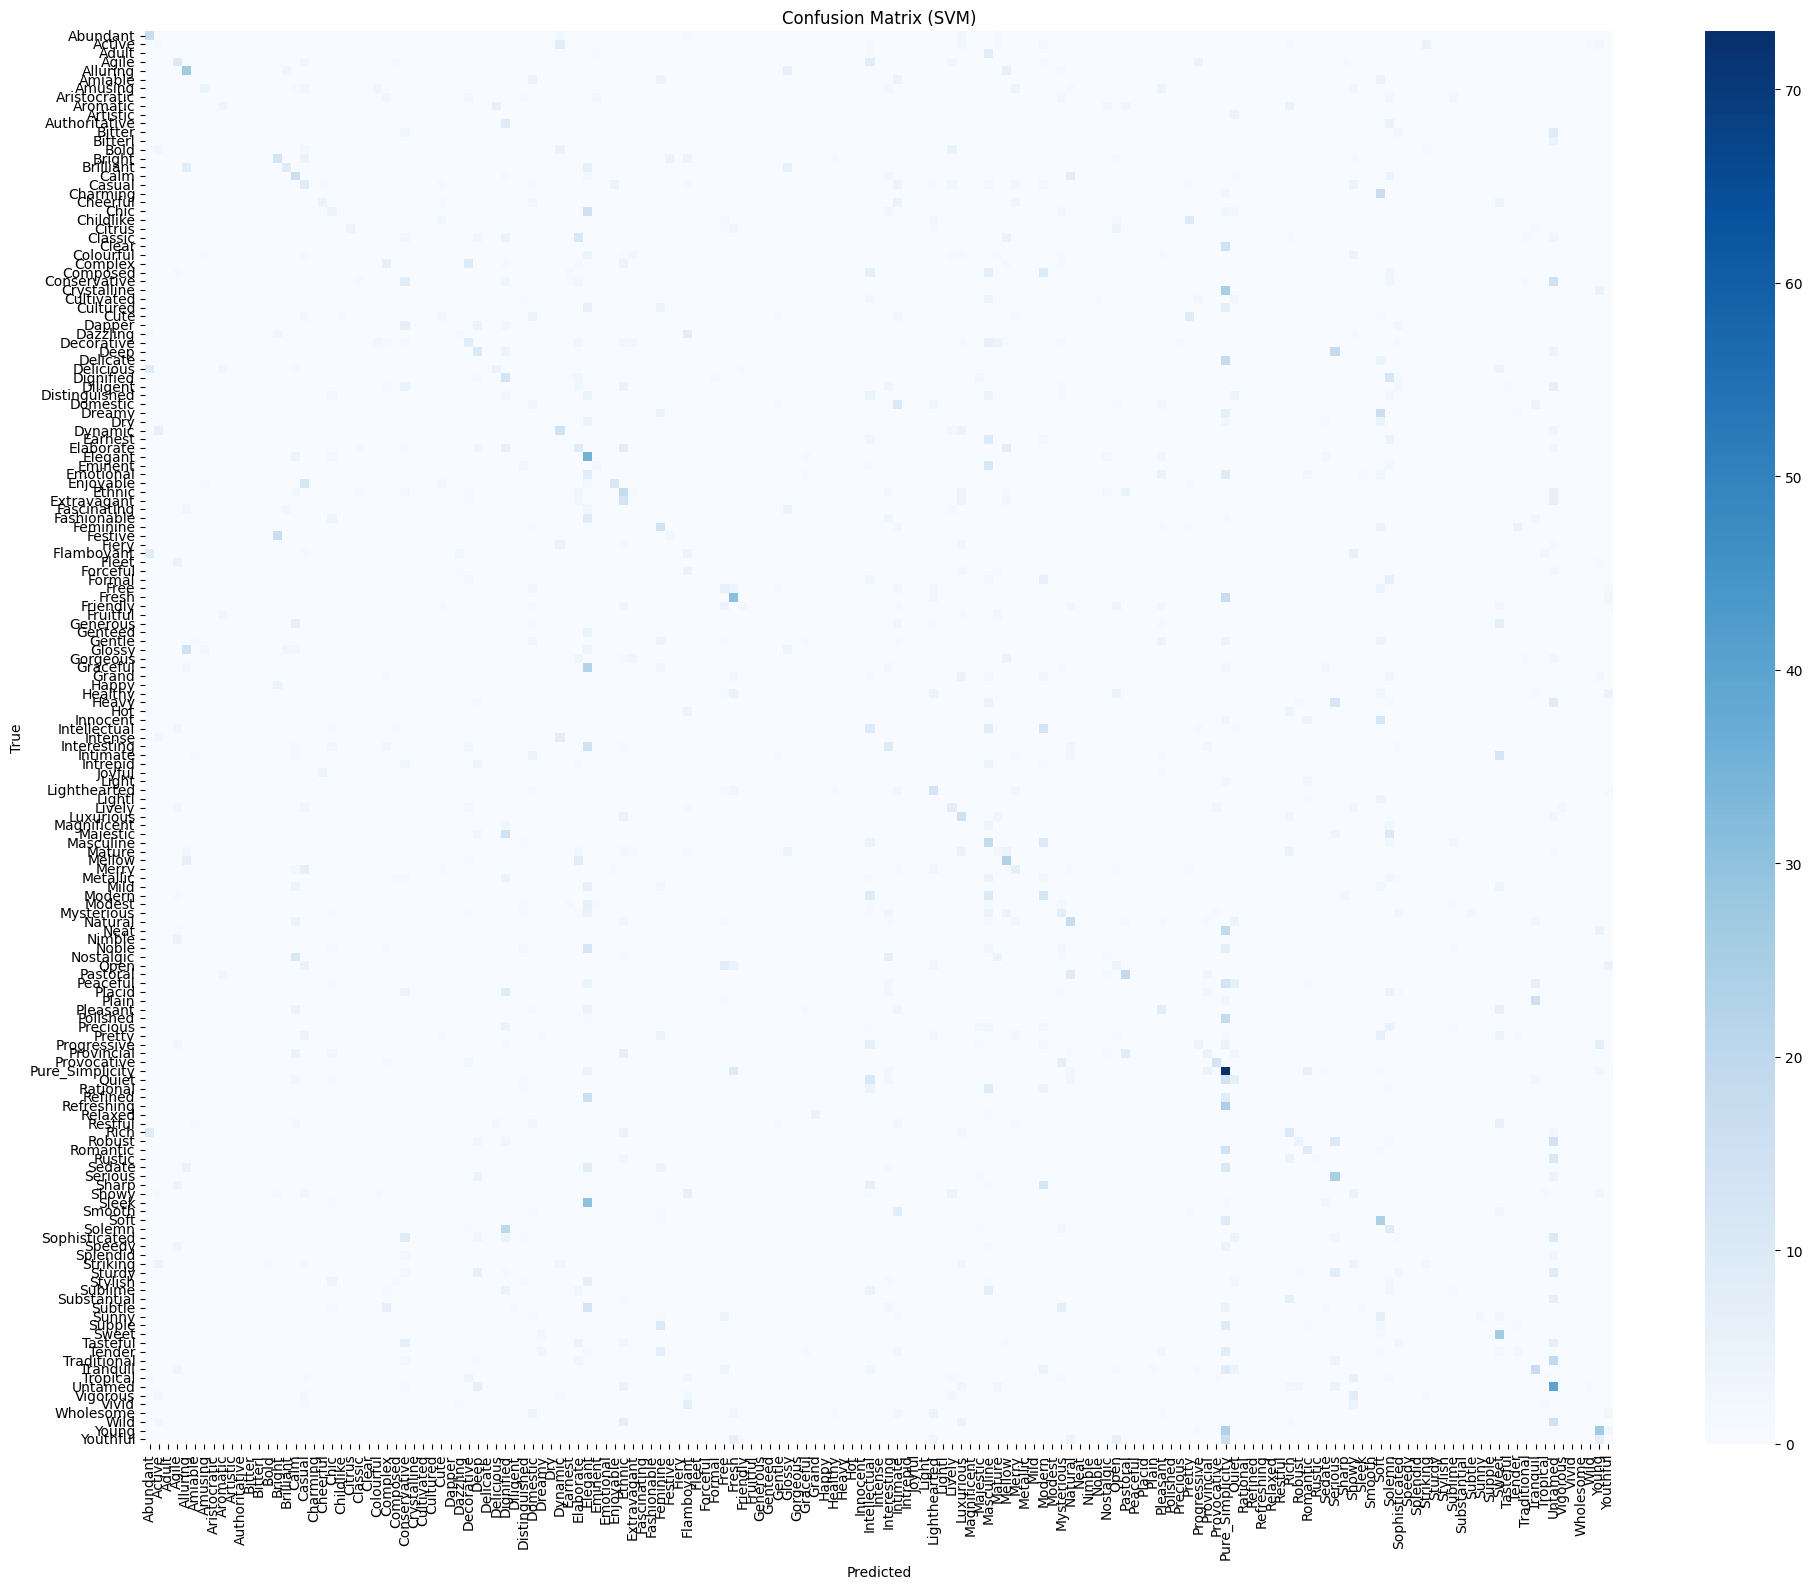

Training final model on entire training set...

Test Set Evaluation:
Test Accuracy: 0.1869
Test F1-score: 0.1301
Test Precision: 0.1234
Test Recall: 0.1869
Plotting learning curve...


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


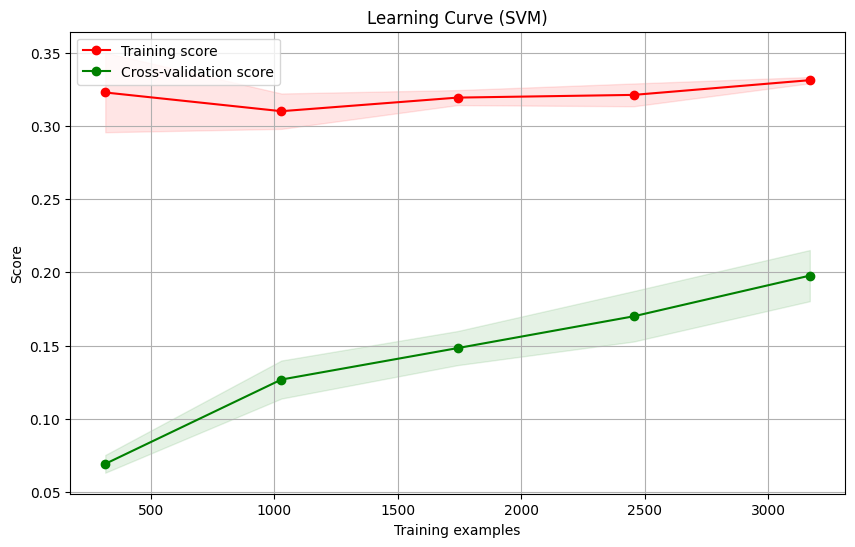


Model Complexity:
Number of support vectors: 3959

Model Fit Analysis:
Training Accuracy: 0.3379
Test Accuracy: 0.1869
Model may be overfitting: Training accuracy is significantly higher than test accuracy.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Load and preprocess the data
print("Loading and preprocessing data...")
data = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned_remove.csv')
X = data.iloc[:, 1:].values / 255.0  # Features (RGB values), normalized
y = data.iloc[:, 0].values # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
print("Performing cross-validation...")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
accuracies = []
all_y_true = []
all_y_pred = []

start_time = time.time()

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred = svm_model.predict(X_val_fold)
    
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)
    
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred)
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1_score(y_val_fold, y_pred, average='weighted'):.4f}")
    print()

end_time = time.time()

# Print overall results
print("\nSVM Model Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")

# Calculate and print F1-score, precision, and recall
f1 = f1_score(all_y_true, all_y_pred, average='weighted')
precision = precision_score(all_y_true, all_y_pred, average='weighted')
recall = recall_score(all_y_true, all_y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"Training time: {end_time - start_time:.2f} seconds")

# Generate classification report
class_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=class_names))

# Generate confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Train the final model on the entire training set
print("Training final model on entire training set...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)

print("\nTest Set Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test F1-score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")

# Plot learning curve
print("Plotting learning curve...")
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train_scaled, y_train, cv=5)
plt.show()

# Model complexity
n_support_vectors = svm_model.n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
train_score = svm_model.score(X_train_scaled, y_train)
test_score = svm_model.score(X_test_scaled, y_test)
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

if train_score > test_score + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_score < test_score - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

Plotting ROC curve...


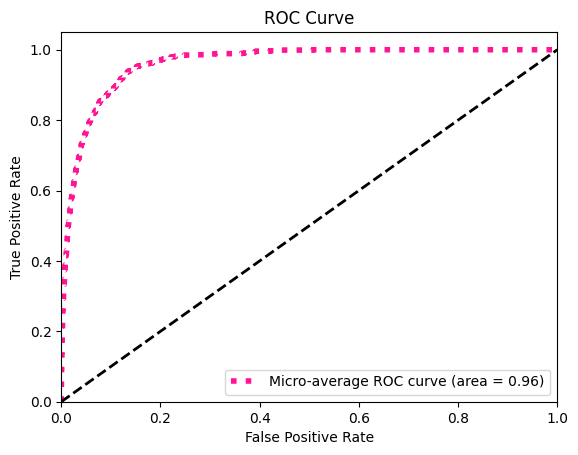

In [3]:
# Plot ROC curve
print("Plotting ROC curve...")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

# Plot reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



### Simple SVM model

characteristics : Uses a (RBF) kernel , Performs 5-fold cross-validation , Uses StandardScaler for feature scaling , Doesn't perform hyperparameter tuning


Loading and preprocessing data...
Performing cross-validation...
Fold 1
Accuracy: 0.5892
F1-Score: 0.5729

Fold 2
Accuracy: 0.5663
F1-Score: 0.5480

Fold 3
Accuracy: 0.5903
F1-Score: 0.5700

Fold 4
Accuracy: 0.5792
F1-Score: 0.5604

Fold 5
Accuracy: 0.5690
F1-Score: 0.5544


SVM Model Results:
Mean Accuracy: 0.5788 (+/- 0.0099)
F1-score: 0.5627
Precision: 0.5890
Recall: 0.5788
Training time: 83.68 seconds

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.62      0.86      0.72        84
         Active       0.53      0.60      0.56        83
          Adult       0.60      0.87      0.71        86
          Agile       0.69      0.74      0.72        86
       Alluring       0.72      0.65      0.68        86
        Amiable       0.32      0.63      0.43        87
        Amusing       0.77      0.87      0.82        83
   Aristocratic       0.87      0.92      0.89        86
       Aromatic       0.79      0.81      0.80       

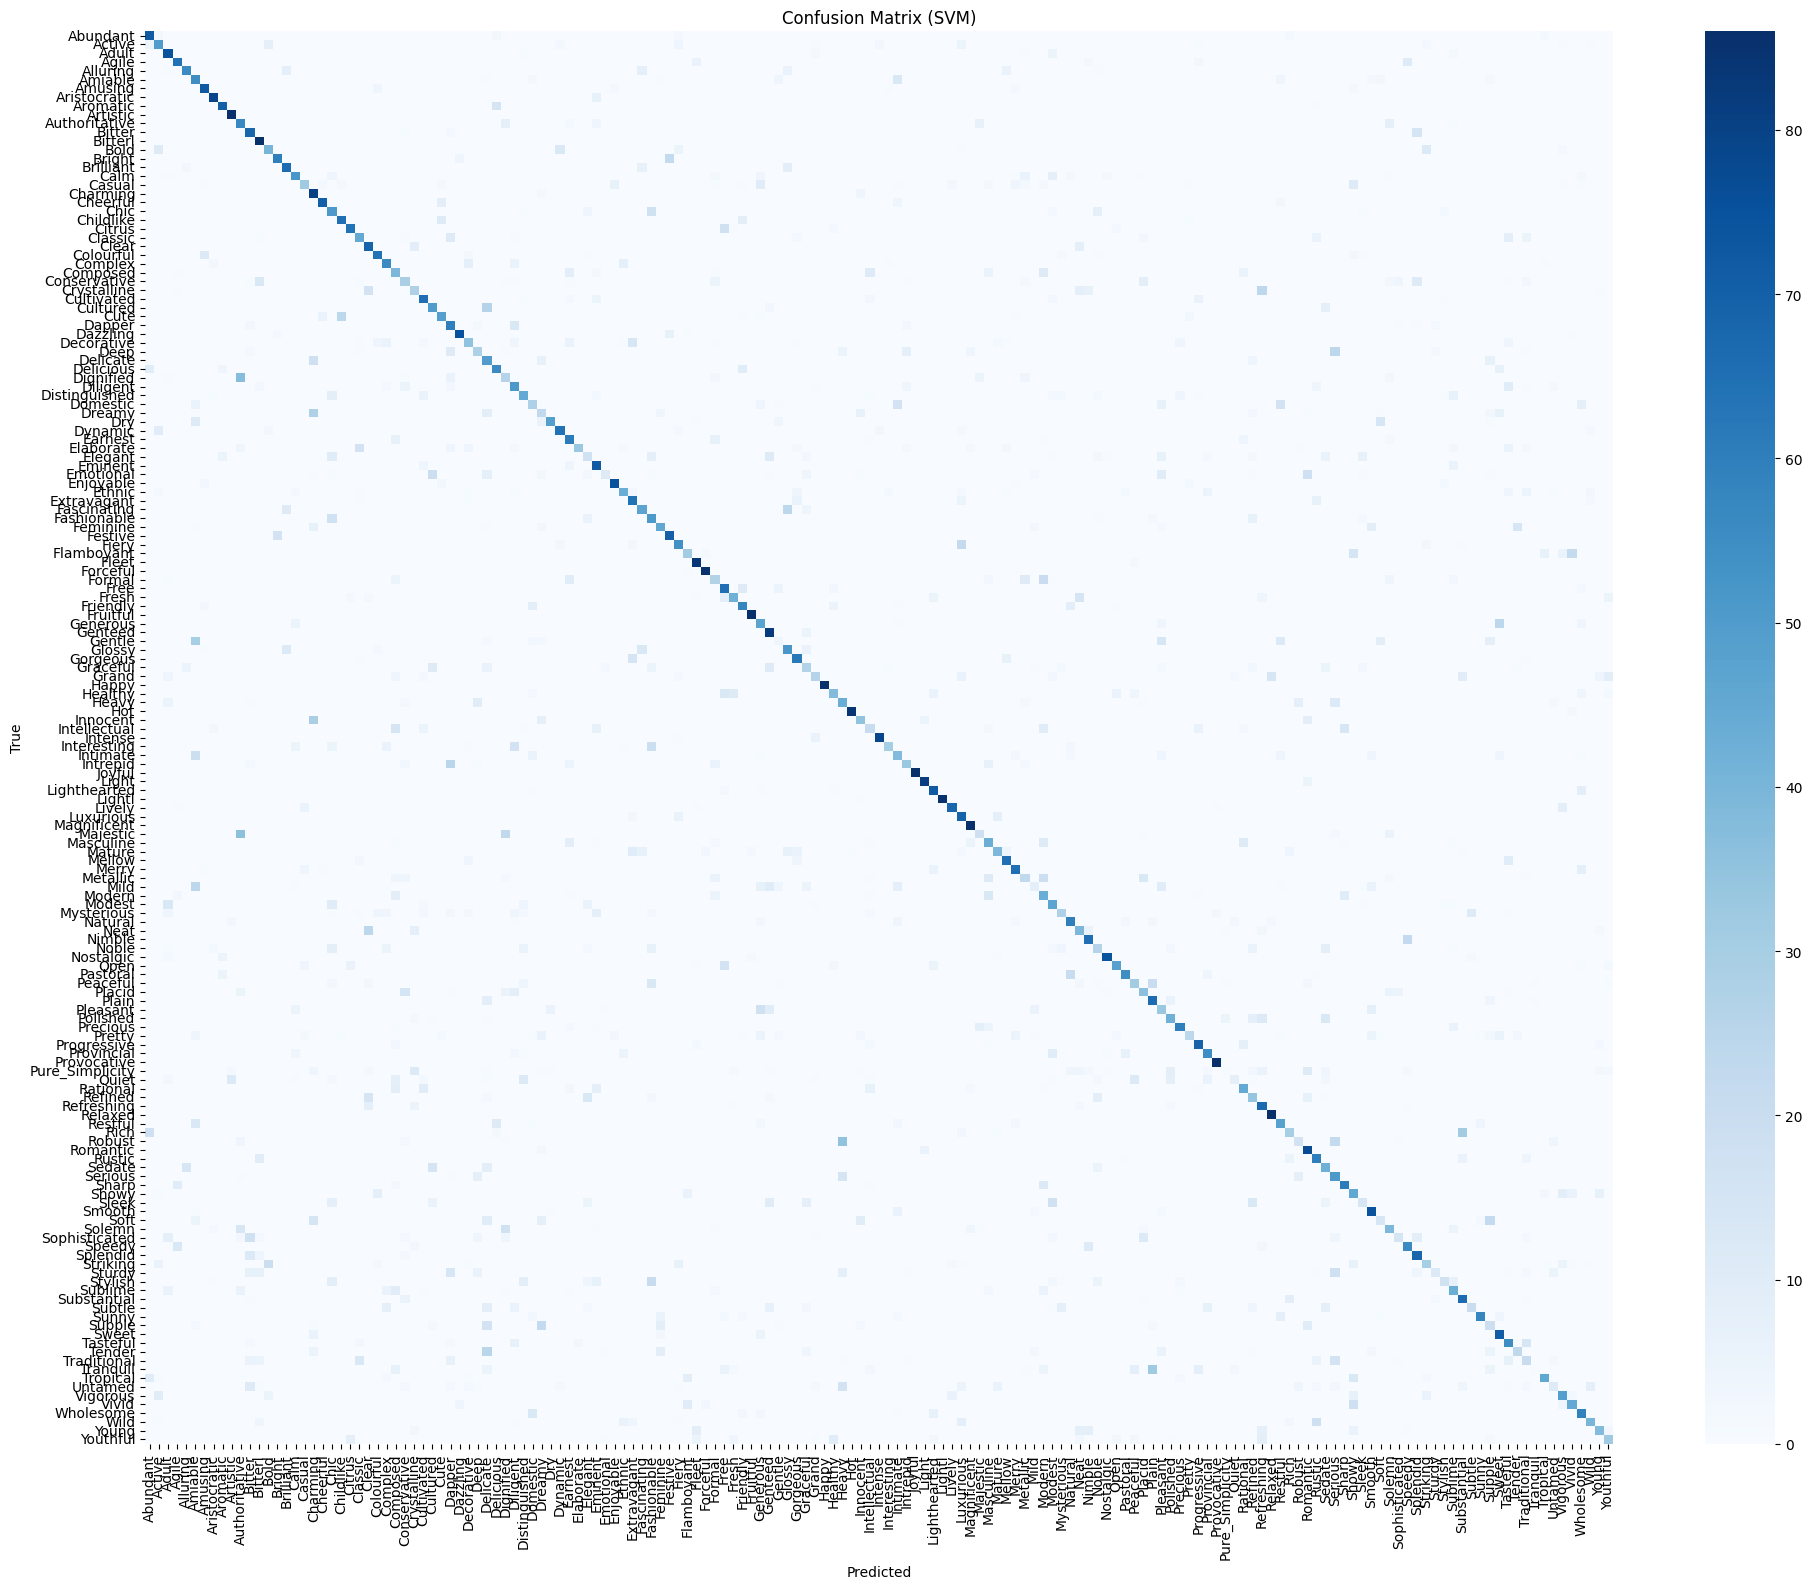

Training final model on entire training set...

Test Set Evaluation:
Test Accuracy: 0.6132
Test F1-score: 0.5967
Test Precision: 0.6259
Test Recall: 0.6132
Plotting learning curve...


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


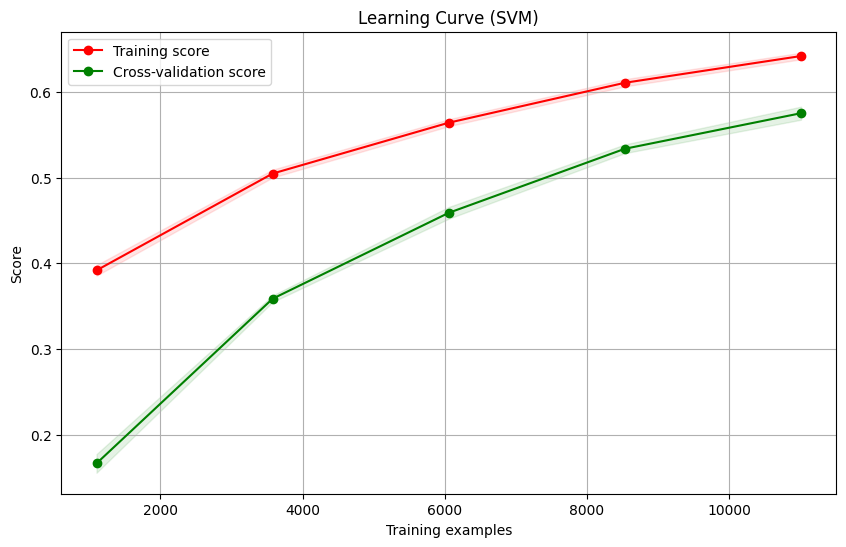


Model Complexity:
Number of support vectors: 13414

Model Fit Analysis:
Training Accuracy: 0.6677
Test Accuracy: 0.6132
Model may be overfitting: Training accuracy is significantly higher than test accuracy.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings  # Warning control

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Load and preprocess the data
print("Loading and preprocessing data...")
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize feature values
y = data.iloc[:, -1].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
print("Performing cross-validation...")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
accuracies = []
all_y_true = []
all_y_pred = []

start_time = time.time()

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred = svm_model.predict(X_val_fold)
    
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)
    
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred)
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1_score(y_val_fold, y_pred, average='weighted'):.4f}")
    print()

end_time = time.time()

# Print overall results
print("\nSVM Model Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")

# Calculate and print F1-score, precision, and recall
f1 = f1_score(all_y_true, all_y_pred, average='weighted')
precision = precision_score(all_y_true, all_y_pred, average='weighted')
recall = recall_score(all_y_true, all_y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"Training time: {end_time - start_time:.2f} seconds")

# Generate classification report
class_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=class_names))

# Generate confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Train the final model on the entire training set
print("Training final model on entire training set...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)

print("\nTest Set Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test F1-score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")

# Plot learning curve
print("Plotting learning curve...")
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train_scaled, y_train, cv=5)
plt.show()

# Model complexity
n_support_vectors = svm_model.n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
train_score = svm_model.score(X_train_scaled, y_train)
test_score = svm_model.score(X_test_scaled, y_test)
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

if train_score > test_score + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_score < test_score - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

Plotting ROC curve...


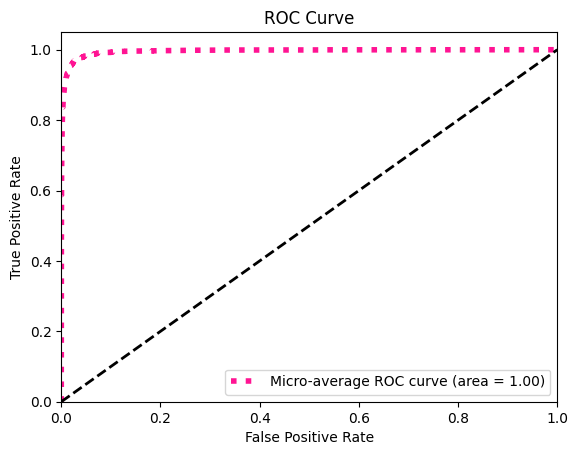

In [5]:
# Plot ROC curve
print("Plotting ROC curve...")
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

# Plot reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



### Analysis of Simple SVM model

1. Model Architecture: Support Vector Machine with RBF (Radial Basis Function) kernel
2. Performance Metrics:

- Mean Cross-validation Accuracy: 0.5788 (57.88%)
- Test Accuracy: 0.6132 (61.32%)
- Test F1-score: 0.5967 (59.67%)
- Test Precision: 0.6259 (62.59%)
- Test Recall: 0.6132 (61.32%)
- Training Accuracy: 0.6677 (66.77%)

3. Training Process: Used 5-fold cross-validation . Total training time: 71.80 seconds

4. Generalization:

- The model shows signs of overfitting: Training accuracy (66.77%) is significantly higher than test accuracy (61.32%) . The learning curve shows a gap between training and cross-validation scores, which doesn't narrow significantly as the number of training examples increases

5. Model Complexity:

- Number of support vectors: 13,414
- This is a high number of support vectors, indicating a complex decision boundary

6. Bias-Variance Trade-off:

- Moderate bias: Training accuracy of 66.77% suggests the model hasn't fully captured all patterns
- High variance: Gap between training (66.77%) and test (61.32%) accuracies indicates overfitting
- Bias estimate: 1 - Training Accuracy = 1 - 0.6677 = 0.3323 (33.23%)
- The model has relatively high bias (about 33.23%), meaning it's underfitting the training data . It also shows signs of overfitting to the training set, not generalizing well to new data

7. Class Performance: Performance varies widely across classes

- Best performing classes: Happy, Joyful, Lightl: 100% precision and recall . Hot, Fruitful, Provocative: > 95% precision and recall
- Worst performing classes: Pure_Simplicity, Tranquil: 2% F1-score . Gentle: 7% F1-score . Mild, Quiet: 14-16% F1-score


### Final Version


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold


# Load and preprocess the data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Encode the target variable by converting it to numerical from starting from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True))
])

# Defines the hyperparameters to search over in GridSearchCV
param_grid = [
    {
        'svm__kernel': ['rbf'],
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
        'svm__class_weight': [None, 'balanced'],
    },
    {
        'svm__kernel': ['poly'],
        'svm__degree': [2, 3, 4],
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
        'svm__coef0': [0.0, 0.1, 0.5, 1.0],
        'svm__class_weight': [None, 'balanced'],
    },
]

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cv in GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], # evaluate based on multiple metrics
    refit='accuracy' # final model is refit using the parameter setting that has the best accuracy
)

# Fit the grid search , starts timers , fits the model and record training time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get the best model
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_results = grid_search.cv_results_
print(f"Cross-validation scores:")
print(f"Accuracy: {cv_results['mean_test_accuracy'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_accuracy'][grid_search.best_index_]:.4f})")
print(f"Precision: {cv_results['mean_test_precision_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_precision_macro'][grid_search.best_index_]:.4f})")
print(f"Recall: {cv_results['mean_test_recall_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_recall_macro'][grid_search.best_index_]:.4f})")
print(f"F1-score: {cv_results['mean_test_f1_macro'][grid_search.best_index_]:.4f} (+/- {cv_results['std_test_f1_macro'][grid_search.best_index_]:.4f})")

# Make predictions on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics for train and test sets
def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# Displays best hyperparameters , training time and performance metrics
print("\nImproved SVM Model Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"\nTraining time: {end_time - start_time:.2f} seconds")
print("\nMetrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"{metric.capitalize()}:")
    print(f"  Train: {train_metrics[metric]:.4f}")
    print(f"  Test:  {test_metrics[metric]:.4f}")
    print(f"  Difference: {train_metrics[metric] - test_metrics[metric]:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_svm.png')
plt.close()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Learning Curves (SVM)")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('learning_curves_svm.png')
plt.close()

# Plot ROC curve : evaluate the model's ability to distinguish between classes
print("Plotting ROC curve...")
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC computation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Obtain predicted probabilities
y_score = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

from sklearn.metrics import roc_curve, auc

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_svm.png')
plt.close()

# Model complexity
n_support_vectors = best_model.named_steps['svm'].n_support_.sum()
print(f"\nModel Complexity:")
print(f"Number of support vectors: {n_support_vectors}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Training Accuracy: {train_metrics['accuracy']:.4f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")

if train_metrics['accuracy'] > test_metrics['accuracy'] + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than test accuracy.")
elif train_metrics['accuracy'] < test_metrics['accuracy'] - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than test accuracy.")
else:
    print("Model fit seems reasonable: Training and test accuracies are close.")

Fitting 5 folds for each of 910 candidates, totalling 4550 fits
Cross-validation scores:
Accuracy: 0.9265 (+/- 0.0030)
Precision: 0.9288 (+/- 0.0026)
Recall: 0.9259 (+/- 0.0030)
F1-score: 0.9237 (+/- 0.0028)

Improved SVM Model Results:
Best parameters: {'svm__C': 100, 'svm__class_weight': None, 'svm__coef0': 1.0, 'svm__degree': 4, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}

Training time: 92564.57 seconds

Metrics:
Accuracy:
  Train: 0.9955
  Test:  0.9448
  Difference: 0.0507
Precision:
  Train: 0.9955
  Test:  0.9465
  Difference: 0.0490
Recall:
  Train: 0.9954
  Test:  0.9438
  Difference: 0.0516
F1:
  Train: 0.9954
  Test:  0.9415
  Difference: 0.0539

Classification Report (Test Set):
                 precision    recall  f1-score   support

       Abundant       1.00      1.00      1.00        21
         Active       0.81      1.00      0.89        21
          Adult       0.95      1.00      0.98        21
          Agile       1.00      1.00      1.00        22
       Alluring

### Analysis of the Hyperparameters !

1. svm\_\_kernel: 'poly'
   Specifies the kernel type to be used in the algorithm. The polynomial kernel transforms the input data into a higher-dimensional space to make it possible to perform linear separation in that space. Allows the model to capture non-linear relationships by considering polynomial combinations of features.
2. svm\_\_degree: 4
   Degree of the polynomial kernel function. Controls the complexity of the decision boundary. Captures complex relationships between features.A higher degree allows for more complex models but may increase the risk of overfitting.
3. svm\_\_C: 100
   Regularization parameter. Focuses on correctly classifying all training examples. It controls the trade-off between achieving a low training error and a low testing error. A higher C value means the model tries to classify all training examples correctly, which can lead to overfitting.
4. svm\_\_gamma: 0.1
   Kernel coefficient for 'poly', 'rbf', and 'sigmoid'. Determines the influence of a single training example. A lower value means 'far' and a higher value means 'close'.
5. svm\_\_coef0: 1.0
   Independent term in the kernel function. It's significant in 'poly' and 'sigmoid' kernels. Helps in controlling the flexibility of the decision boundary. Controls the trade-off between the higher-order and lower-order terms in the polynomial kernel.
6. svm\_\_class_weight: None
   Weights associated with classes to handle class imbalance. Since it's None, all classes are assumed to have equal weight.


### So here is the code with the best hyperparameter values !



Stratified K-Fold Cross-Validation Results:
CV Scores: [0.92989466 0.92953142 0.92262986 0.92732558 0.92332849]
Mean CV Score: 0.9265
Standard Deviation of CV Scores: 0.0030

Final Model Results on Test Set:
Test Accuracy: 0.9448
Test Precision: 0.9470
Test Recall: 0.9448
Test F1-score: 0.9424
Train Accuracy: 0.9955

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.81      1.00      0.89        21
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        22
           4       0.91      1.00      0.95        21
           5       0.91      1.00      0.95        21
           6       0.95      1.00      0.98        20
           7       0.96      1.00      0.98        22
           8       1.00      1.00      1.00        22
           9       0.96      1.00      0.98        22
          10       0.88      1.00      0.93        

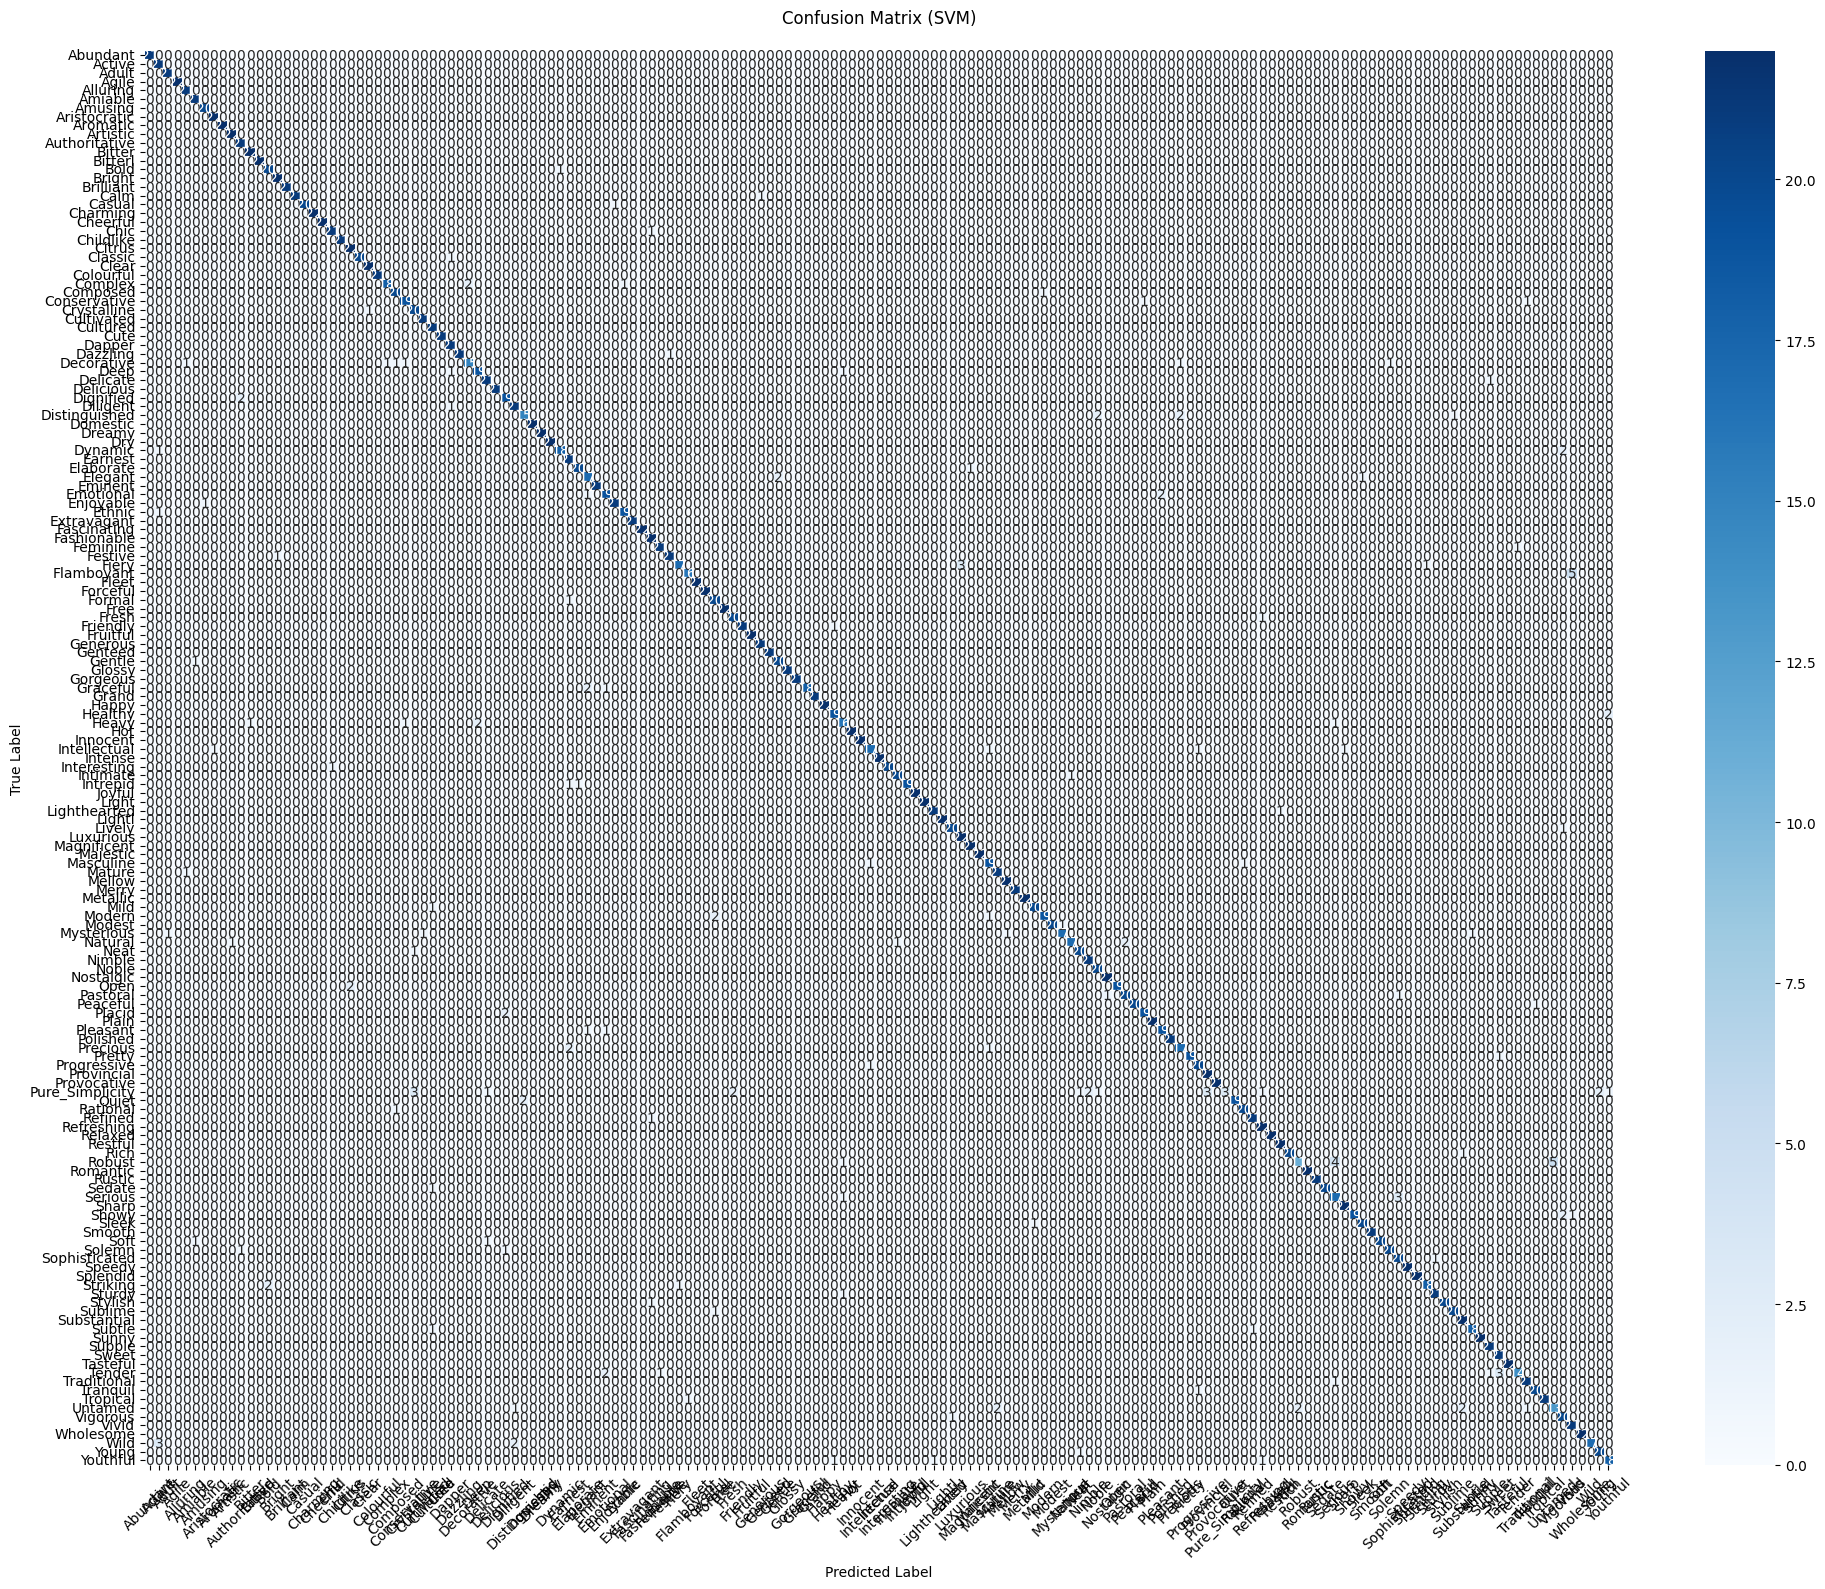

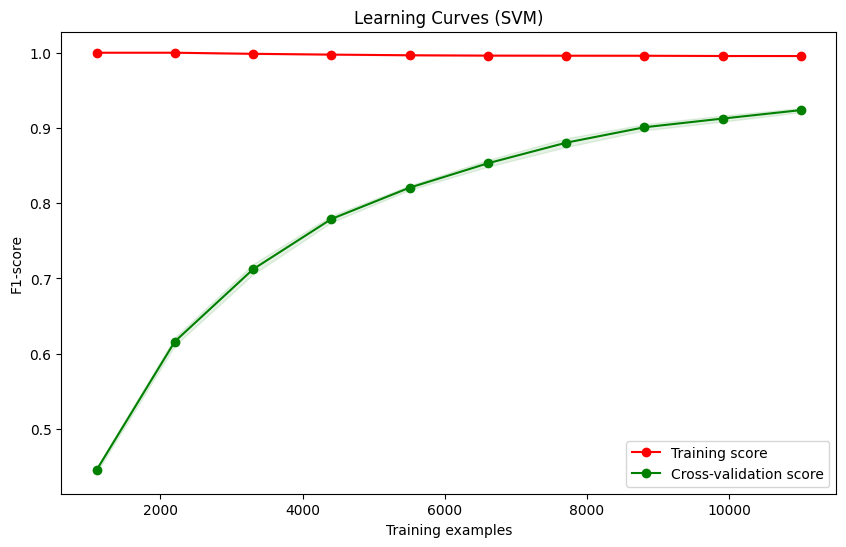

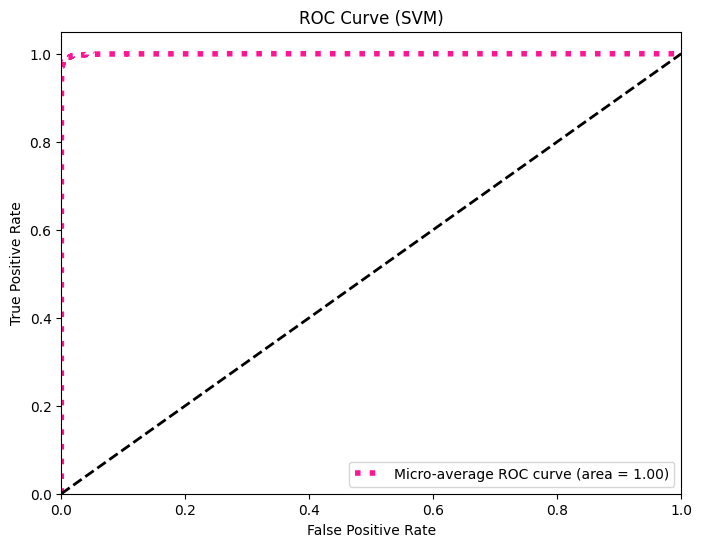

Model saved successfully to ../emotion-predictor/backend/app/model\svm_model.pkl


In [3]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_curve, auc)
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize input features to [0, 1] range
y = data.iloc[:, -1].values

# 3. Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 5. Create a pipeline with the best hyperparameters
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=100, kernel='poly', degree=4, gamma=0.1, coef0=1.0, probability=True, random_state=42))
])

# 6. Set up Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 7. Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=skf, scoring='accuracy')

# Print cross-validation results
print("\nStratified K-Fold Cross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# 8. Fit the model on the entire training set
best_model.fit(X_train, y_train)

# 9. Evaluate the final model on the test set and train set
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Test Metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Train Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)

print("\nFinal Model Results on Test Set:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, 
            annot=True,        
            fmt='d',           
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix (SVM)', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=skf, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Learning Curves (SVM)")
plt.legend(loc="best")
plt.show()

# 12. ROC Curve
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]
y_score = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

# 13. Save the model and scaler
model_dir = '../emotion-predictor/backend/app/model'
os.makedirs(model_dir, exist_ok=True)

# Save the model using pickle
model_path = os.path.join(model_dir, 'svm_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"Model saved successfully to {model_path}")

# Save the label encoder
le_path = os.path.join(model_dir, 'label_encoder.pkl')
with open(le_path, 'wb') as f:     
    pickle.dump(le, f)


### Same model but using CalibratedClassifierCV in order to improve the confideness of the model


In [5]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize input features to [0, 1] range
y = data.iloc[:, -1].values

# 3. Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 5. Create an SVM pipeline (with StandardScaler + SVC)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=100, kernel='poly', degree=4, gamma=0.1, coef0=1.0, 
                probability=True, random_state=42))
])

# 6. Set up Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 7. Perform cross-validation
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

# Print cross-validation results
print("\nStratified K-Fold Cross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# 8. Fit the SVM pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# 9. Calibrate the pipeline using CalibratedClassifierCV
#    Here we use 5-fold for calibration; 'isotonic' typically works well for multi-class
calibrated_svm = CalibratedClassifierCV(
    estimator=svm_pipeline, 
    method='isotonic', 
    cv=5
)
calibrated_svm.fit(X_train, y_train)

# 10. Predict on the test set
y_pred_test = calibrated_svm.predict(X_test)
y_proba_test = calibrated_svm.predict_proba(X_test)  # Calibrated probabilities

# 11. Evaluate
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Calibrated SVM Test Accuracy: {accuracy:.4f}")
print(f"Calibrated SVM Test Precision: {precision:.4f}")
print(f"Calibrated SVM Test Recall: {recall:.4f}")
print(f"Calibrated SVM Test F1-score: {f1:.4f}")

# 12. Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=le.classes_))

# 13. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, 
            annot=True,        
            fmt='d',           
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix (Calibrated SVM)', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 14. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    calibrated_svm, X_train, y_train, cv=skf, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Learning Curves (Calibrated SVM)")
plt.legend(loc="best")
plt.show()

# 15. ROC Curve
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]
y_score = y_proba_test

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Calibrated SVM)')
plt.legend(loc="lower right")
plt.show()

# 16. Save the calibrated model and label encoder
model_dir = '../emotion-predictor/backend/app/model'
os.makedirs(model_dir, exist_ok=True)

# Save the calibrated model using pickle
model_path = os.path.join(model_dir, 'calibrated_svm_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(calibrated_svm, f)
print(f"Calibrated SVM model saved successfully to {model_path}")

# Save the label encoder
le_path = os.path.join(model_dir, 'label_encoder_calibrated.pkl')
with open(le_path, 'wb') as f:
    pickle.dump(le, f)
print(f"Label Encoder saved successfully to {le_path}")

Calibrated SVM Test Accuracy: 0.9471
Calibrated SVM Test Precision: 0.9502
Calibrated SVM Test Recall: 0.9471
Calibrated SVM Test F1-score: 0.9449

Classification Report (Test Set):
                 precision    recall  f1-score   support

       Abundant       1.00      1.00      1.00        21
         Active       0.84      1.00      0.91        21
          Adult       0.95      1.00      0.98        21
          Agile       1.00      1.00      1.00        22
       Alluring       0.91      1.00      0.95        21
        Amiable       1.00      1.00      1.00        21
        Amusing       0.95      1.00      0.98        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       1.00      1.00      1.00        22
  Authoritative       0.91      1.00      0.95        21
         Bitter       1.00      1.00      1.00        22
        Bitterl       1.00      1.00      1.00        22
           Bold    